In [1]:
import zipfile
import pandas as pd
import statsmodels.api as sm
import numpy as np
from pixelmed_calc.medical_imaging.RadiologyComponents.solution import convert_chinese_columns_to_numeric
%matplotlib inline

import pandas as pd
#data = load_dataset('pn2012')
data = pd.read_csv('convert_chinese_columns_to_numeric.csv')
## 如果有不需要的列，可以指定排除['ID','No','surgery_number','surgery_numbernii']
#data=data[data['group']=='test']
data=data.drop(['ID','group','姓名'],axis=1)
display(data.columns)

Index(['label', '年龄', 'ER', 'PR', 'HER-2', '核级别', '肿块最长径（mm）', '部位', '是否溢液',
       '触及肿块', '钙化', '坏死'],
      dtype='object')

In [2]:
categorical = ['ER','核级别']
# 转换数值
data = convert_chinese_columns_to_numeric(data, categorical)
data

Column: ER
0 -> 0
1 -> 1
Column: 核级别
0 -> 0
1 -> 1
2 -> 2


,label,年龄,ER,PR,HER-2,核级别,肿块最长径（mm）,部位,是否溢液,触及肿块,钙化,坏死
0,0,46,0,0,0,0,16.1,0,0,0,0,0
1,0,66,1,1,1,0,16.5,1,0,1,1,1
2,0,69,1,1,0,0,11.2,1,0,1,1,1
3,0,44,0,0,1,1,40.0,0,0,1,0,1
4,0,56,1,0,0,0,70.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
384,0,41,0,0,1,0,19.1,1,1,1,0,0
385,0,40,0,0,1,0,37.3,0,0,0,0,1
386,0,68,0,0,2,2,30.0,1,0,0,2,1
387,1,33,1,1,1,0,44.3,0,0,0,0,1


In [3]:
'''
这个函数 logistic_regression_analysis 接受一个数据集 data，一个特征列表 features 和一个标签列名 label，并返回三个结果：

results_df: 包含所有特征的回归结果，包括 OR，95% CI 和 p-value。
significant_features: p-value 小于阈值的显著特征。
multidata: 仅包含显著特征的数据子集。
'''
from pixelmed_calc.medical_imaging.RadiologyComponents.components1 import single_logistic_regression,multi_logistic_regression,create_forest_plot
features = ['年龄', 'ER', 'PR', 'HER-2', '核级别', '肿块最长径（mm）', '部位', '是否溢液',
       '触及肿块', '钙化', '坏死']  

# 假设 data 是你的数据集  
results_df, significant_features, multidata = single_logistic_regression(data, features,label='label', p_value_threshold=0.05)  

results_df

,Feature,OR,95% CI,p-value
0,年龄,0.957363,"(0.9359934099884775, 0.9792210492968577)",1.549227e-04
1,ER,3.455316,"(2.212606518238184, 5.39599231359058)",4.980791e-08
2,PR,3.621558,"(2.3222632399146064, 5.647803108705923)",1.377240e-08
3,HER-2,0.460346,"(0.3247369571834703, 0.6525851354744449)",1.317496e-05
4,核级别,0.239165,"(0.15782007784323407, 0.36243640845837705)",1.528851e-11
5,肿块最长径（mm）,1.031744,"(1.0187280961751033, 1.0449261442558868)",1.403701e-06
6,部位,1.052892,"(0.6889773439865207, 1.6090239196171727)",8.117264e-01
7,是否溢液,1.799105,"(0.9778417906948869, 3.3101269494233407)",5.903508e-02
8,触及肿块,0.359461,"(0.23257715977041785, 0.5555655244926033)",4.106317e-06
9,钙化,0.795867,"(0.6189253858756817, 1.0233933783214983)",7.512196e-02


In [5]:
significant_features

0            年龄
1            ER
2            PR
3         HER-2
4           核级别
5     肿块最长径（mm）
8          触及肿块
10           坏死
Name: Feature, dtype: object

In [8]:
#多因素逻辑回归筛选特征

multi_results_df=multi_logistic_regression(data,features = multidata.columns,label='label')
multi_results_df

Optimization terminated successfully.
         Current function value: 0.481115
         Iterations 6


,OR,95% CI Lower,95% CI Upper,p-value
const,10.590397,2.243228,49.997812,0.002880
年龄,0.942698,0.916842,0.969282,0.000032
ER,1.468825,0.689974,3.126855,0.318613
PR,2.186050,1.007334,4.744021,0.047878
HER-2,0.824013,0.555097,1.223204,0.336867
核级别,0.364093,0.225846,0.586965,0.000034
肿块最长径（mm）,1.016321,1.001382,1.031483,0.032134
触及肿块,0.395609,0.236537,0.661659,0.000410
坏死,1.090975,0.643226,1.850402,0.746685


In [9]:
multi_results_df[multi_results_df['p-value']<0.05]

,OR,95% CI Lower,95% CI Upper,p-value
const,10.590397,2.243228,49.997812,0.002880
年龄,0.942698,0.916842,0.969282,0.000032
PR,2.186050,1.007334,4.744021,0.047878
核级别,0.364093,0.225846,0.586965,0.000034
肿块最长径（mm）,1.016321,1.001382,1.031483,0.032134
触及肿块,0.395609,0.236537,0.661659,0.000410


def create_forest_plot(
    labels, measure, lower, upper,
    plot_title="Forest Plot",
    suptitle="",
    xlabel="",
    figsize=(7, 3),
    pointshape="D",
    max_value=4,
    min_value=0.35,
    t_adjuster=0.09,
    color='black',
    title_loc="right"
):
    """
    Create a forest plot using the provided measures and CIs.

    Parameters:
    labels (list of str): A list of labels for each effect measure.
    measure (list of float): A list of effect measures.
    lower (list of float): A list of lower confidence limits.
    upper (list of float): A list of upper confidence limits.
    plot_title (str): The title of the plot.
    suptitle (str): The super title of the plot.
    xlabel (str): The label of the x-axis.
    figsize (tuple): The size of the figure.
    pointshape (str): The shape of the points.
    max_value (float): The maximum value for x-axis.
    min_value (float): The minimum value for x-axis.
    t_adjuster (float): Adjustment of text position.
    color (str): The color of the points.
    title_loc (str): The location of the title ('left', 'center', 'right').
    """

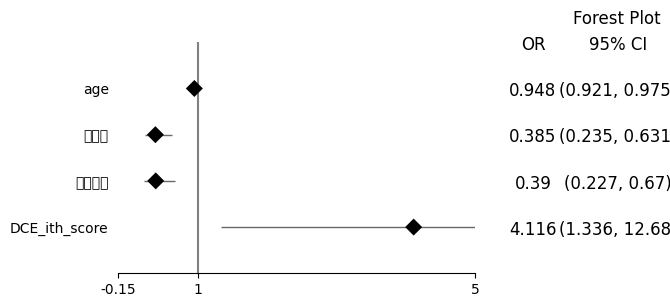

In [14]:
import matplotlib.pyplot as plt

labels = ['age',  '核级别', '触及肿块', 'DCE_ith_score']
measure = [0.948, 0.385,0.390	,4.116	]
lower = [0.921, 0.235, 0.227	, 1.336	]
upper = [0.975, 0.631, 0.670, 12.680]

create_forest_plot(labels,measure,lower,upper,max_value=5,
    min_value=-0.15,)
plt.savefig('force.svg')
plt.show()